
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 <br>
<font color=696880 size=4>
    Amirabbas Afzali 

____

# Personal Data

In [14]:
# Set your student number
student_number = '402200359'
Name = 'Muhammad Erfan'
Last_Name = 'Bagherinejad'

# Rules
- Make sure that all of your cells can be run perfectly. 
- Try to minimize your use of ChatGPT (or any other AI assistant) as much as possible.
- You must create a report for this task in PDF format and explain the main results.

---

## **Introduction**

Large Language Models (LLMs) are a class of deep learning models designed for processing and generating natural language. These models are trained using large amounts of textual data and utilize architectures based on transformers. Some of the applications of these models include text generation, machine translation, text summarization, question answering, and text classification.

### *Encoder-Decoder LLMs*

One of the common architectures in large language models is the Encoder-Decoder architecture. In this architecture, the encoder processes an input sequence and maps it to a latent space. Then, the decoder uses this latent space to generate an output sequence. Models like T5 [1] (Text-to-Text Transfer Transformer) use this architecture to perform various tasks. In T5, all tasks are expressed in a "text-to-text" format, meaning both input and output are text. This model has capabilities such as translation, summarization, and text classification. One of the advantages of the Encoder-Decoder architecture is that it allows the encoder to utilize information from both before and after a word to gain a more comprehensive understanding of the text.

### *Decoder-only LLMs*

Decoder-only models, such as GPT-2, GPT-3, and LLaMA [2], unlike the Encoder-Decoder architecture, only use the decoder part. These models use an autoregressive mode, meaning they predict the next token based on previous tokens. These models are highly efficient for text generation and have found widespread applications today.

Advantages of Decoder-only Models

- Efficiency: Decoder-only models are more efficient than Encoder-Decoder models due to the absence of an independent encoder. This makes them require fewer computational and memory resources.
- Simplicity: Due to their autoregressive nature, these models can easily generate sequences in order.
- Scalability: Due to their simpler architecture, these models can be scaled to much larger sizes.


However, one of the drawbacks of these models is that they can only utilize information from tokens before the current token and cannot use tokens that come after for prediction. This limitation is significant in tasks like classification or translation, where a full understanding of the sequence is needed.



## **Objective of the Exercise**


In this exercise, the goal is to convert a generative Decoder-only language model into an encoder and evaluate its performance on a binary sentiment classification task. The main aim is to modify the Decoder-only model so that it can function as an encoder and better handle tasks requiring bidirectional understanding.

## **In this exercise, you should:**


### In this exercise, you should:

1. **Import a Decoder-only model** and load the weights of a pre-trained version of the model.
2. **Generate several outputs from the model**, and include at most 10 sample outputs in your report for different inputs.  
   You should also briefly explain the effects of key configurations in text generation, including:  
   - `Temperature`
   - `top_k`
   - `top_p`
   - `repetition_penalty`
   - `num_beams`
   - `no_repeat_ngram_size`
3. **Load the SST-2 dataset**, which is part of the GLUE benchmark for sentiment classification.  
   - Note that the model’s output depends on the number of input tokens. 
   - Apply necessary padding to the dataset after loading it to allow for parallel execution of the model.
4. **Remove the model’s final layer**, which outputs to the size of the model’s dictionary.  
   - Use the embedding vector of the first token (CLS token) for classification.
5. As observed in the previous step, sometimes the embedding vector of the first token does not provide a good representation of the entire input text.  
   - **Add a linear layer** with the same input and output dimensions on top of the encoder's output, and use the output of this linear layer (corresponding to the CLS token) for classification.  
   - This step aggregates information of different tokens to get a comprehensive understanding of the input text.
6. **Instead of the linear layer** in the previous section, use a **bidirectional attention layer** with a custom number of heads (preferably 12).
7. **Repeat step 6** using **left-to-right unidirectional attention** and **right-to-left unidirectional attention**.
8. **Load a pre-trained decoder** (preferably BERT-base) and report its **zero-shot performance** (i.e., without needing to train the model) on the test data.

## **Evaluation:**

In this exercise, for each of sections 4, 5, 6, 7, and 8, you need to plot the confusion matrix corresponding to the model's performance on the test data. Additionally, you should plot two separate graphs showing the training loss and the accuracy of the trained models, and compare them with each other, providing an appropriate analysis of your results. Also, note that high accuracy is not expected for sections 4 and 5, but the correctness of your code will be checked. However, for sections 6 and 7, higher accuracy (around 90%) is expected.













## **Let's go:**


Load `gpt2` model:

In [1]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)
    
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
print(model)

cuda


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


### Explanation of Key Configurations

1. **Temperature:**
   - Controls randomness in text generation.
   - Higher values (e.g., 1.0) make the output more diverse by sampling less probable tokens.
   - Lower values (e.g., 0.5) make the model deterministic, favoring highly probable tokens.

2. **Top-k Sampling:**
   - Limits the next token's selection to the top-k most probable tokens.
   - Example: `top_k=50` means only the 50 highest-probability tokens are considered, making generation more focused.

3. **Top-p (Nucleus) Sampling:**
   - Selects tokens from the smallest set whose cumulative probability exceeds a threshold `p` (e.g., `0.9`).
   - Dynamic compared to `top_k`, adapting the number of tokens based on context.

4. **Repetition Penalty:**
   - Penalizes repetitive token sequences to encourage more diverse outputs.
   - Example: A value of `1.2` discourages repeating phrases, while `1.0` disables the penalty.

5. **Num Beams (Beam Search):**
   - Explores multiple possible sequences in parallel, choosing the most likely ones.
   - Example: `num_beams=5` evaluates 5 sequences, improving coherence but sacrificing randomness.

6. **No Repeat N-Gram Size:**
   - Ensures that no n-grams of a specified size are repeated.
   - Example: `no_repeat_ngram_size=3` prevents sequences like "I am I am."

---

### Notes:
- Adjust parameters like `temperature`, `top_k`, and `top_p` to experiment with different styles of generation.
- Use `num_beams` for deterministic, high-quality outputs and omit it for more creative sampling.
- Combine `no_repeat_ngram_size` with `repetition_penalty` to prevent repetitive outputs.

In [4]:
def generate_text(
    model,
    prompt,
    top_k=None,
    top_p=None,
    early_stopping=False,
    max_length=100,
    temperature=0.8,
    repetition_penalty=1.0,
    num_beams=None,
    no_repeat_ngram_size=None,
):
    model.eval()
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(model.device)
    use_sampling = num_beams is None or num_beams == 1  # Sampling is active when num_beams is None or 1

    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature if use_sampling else 1.0,  # Temperature only applies for sampling
        top_k=top_k if use_sampling else None,  # top_k applies only for sampling
        top_p=top_p if use_sampling else None,  # top_p applies only for sampling
        repetition_penalty=repetition_penalty,
        num_beams=num_beams if not use_sampling else 1,  # Beam search activates when num_beams > 1
        no_repeat_ngram_size=no_repeat_ngram_size,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=use_sampling,  # Sampling mode
        early_stopping=early_stopping,  # Early stopping for beam search
    )

    # Decode the generated text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


In [7]:
# Generate varied outputs from different inputs. Each time I execute this block, new results appear.
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)
prompts = ["Once upon a time in Iran", 
           "What is Python?", 
           "What is the influenza virus?", 
           "What is Cancer?", 
           "Humans and bees", 
           "Who is Superman?",
           "Marvel Studio", 
           "In the distant past, when dinosaurs",
           "Politics is like this", 
           "GPT"]

for prompt in prompts:
    print(f'Prompt: {prompt}')
    print(generate_text(
        model,
        prompt=prompt,
        top_k=50,
        top_p=0.9,
        temperature=0.8,
        max_length=200,
        no_repeat_ngram_size=2,
    ))
    print('=='*40)

Prompt: Once upon a time in Iran
Once upon a time in Iran, the regime would have had a hard time defending itself. Iran was not the only one in the region who was willing to do more to protect itself from the West. The United States and Europe were willing and able to support the Iranian revolution and build a country that would stand up for the values of the Islamic Republic.

Iran's leaders were eager to defend their country from Western aggression. They were able, by the way, to take advantage of this opportunity and make their own moves. In fact, they were more than willing. According to the CIA's official report from 2003, in response to pressure from U.S. military planners, Iran "engaged in a covert and clandestine campaign to influence the U-6 mission and the entire U of A nuclear project in order to strengthen its position in international negotiations."
 (The CIA later published its report, "The United Nations: The Rise of an Islamic Revolutionary Guard Corps" in 2007. That re

Load `sst-2` dataset:

In [2]:
from datasets import load_dataset
from transformers import GPT2Tokenizer, GPT2Model
from torch.utils.data import DataLoader, Dataset
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the SST-2 dataset from Hugging Face 
dataset = load_dataset("glue", "sst2")

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [11]:
sentences = dataset['train']['sentence']

In [12]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})


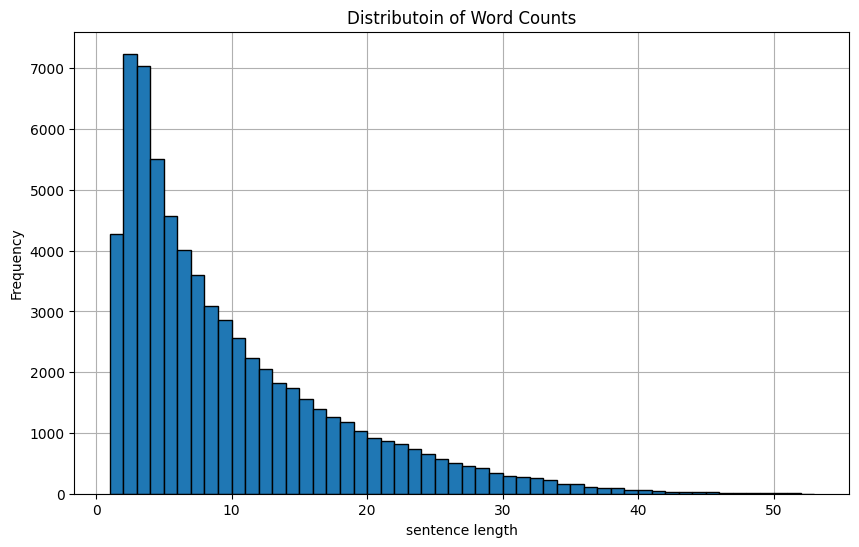

The value greater than 99% of the data is: 35


In [13]:
word_count = [len(sentence.split()) for sentence in sentences]
# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(word_count, 
         bins=range(1, max(word_count) + 2),
         zorder=2, 
         edgecolor='black')
plt.title('Distributoin of Word Counts')
plt.xlabel('sentence length')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Calculate the percentile value
p = 99
maximum_length = int(np.percentile(word_count, p))
print(f"The value greater than {p}% of the data is: {maximum_length}")

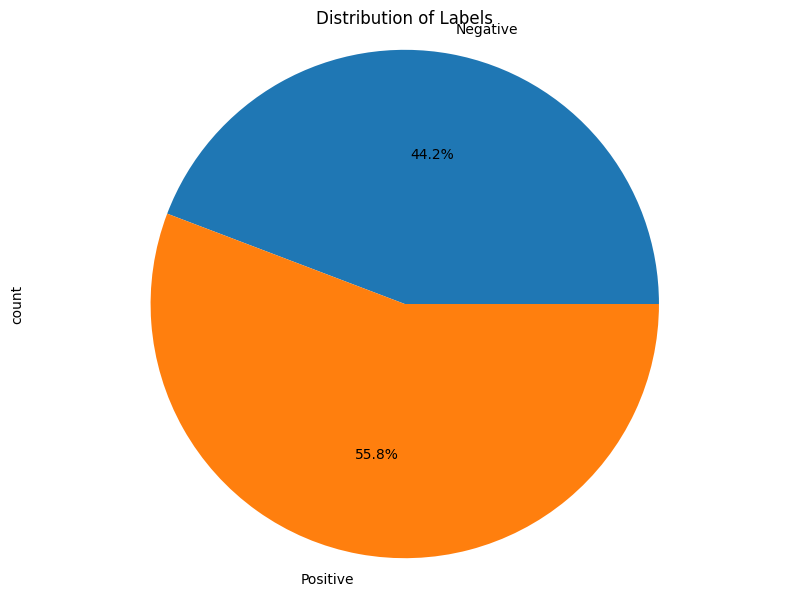

In [4]:
train_labels = dataset['train']['label']
labels_name = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
label_count = [train_labels.count(i) for i in range(len(labels_name))]
plt.pie(label_count, labels=labels_name, autopct='%1.1f%%')
plt.ylabel('count')
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [3]:
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Preprocess function for tokenization and padding
def preprocess_function(examples):
    return tokenizer(
        examples["sentence"],
        padding="max_length",  # Pad to max length
        truncation=True,       # Truncate to max length if necessary
        max_length=32,        # Set a maximum length for inputs
        return_tensors="pt"
    )

# Convert the processed dataset to PyTorch tensors
class SST2Dataset(Dataset):
    def __init__(self, encoded_dataset, split="train"):
        self.dataset = encoded_dataset[split]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Access elements using the dataset structure
        item = {
            "input_ids": self.dataset[idx]["input_ids"],
            "attention_mask": self.dataset[idx]["attention_mask"],
        }
        item["labels"] = self.dataset[idx]["label"]
        # Convert to torch tensors
        item = {key: torch.tensor(val) for key, val in item.items()}
        return item

In [4]:
# Apply the preprocess function to the dataset
encoded_dataset = dataset.map(preprocess_function, batched=True)

batch_size = 256
train_dataset = SST2Dataset(encoded_dataset, split="train")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = SST2Dataset(encoded_dataset, split="validation")
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size)

test_dataset = SST2Dataset(encoded_dataset, split="test")
test_dataloader =  DataLoader(test_dataset, batch_size=1)

# Check one batch of tokenized and padded data
for batch in train_dataloader:
    print(batch["input_ids"].shape)  # Shape: (batch_size, max_length)
    print(batch["attention_mask"].shape)  # Shape: (batch_size, max_length)
    print(batch["labels"].shape)  # Shape: (batch_size)
    break

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

torch.Size([256, 32])
torch.Size([256, 32])
torch.Size([256])


In [5]:
print("Train dataset length:", len(train_dataset))
print("Validation dataset length:", len(validation_dataset))
print("Test dataset length:", len(test_dataset))

Train dataset length: 67349
Validation dataset length: 872
Test dataset length: 1821


In [16]:
base_model = GPT2Model.from_pretrained("gpt2")

# Define a classification model based on GPT-2
class GPT2_clss_v1(nn.Module):
    def __init__(self, base_model, num_classes=2):
        super(GPT2_clss_v1, self).__init__()
        self.gpt2 = base_model  # Pretrained GPT-2 without the language modeling head
        
        # # Freeze GPT-2 parameters to prevent them from being updated
        # for param in self.gpt2.parameters():
        #     param.requires_grad = False
        
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, num_classes)  # Classification head

    def forward(self, input_ids, attention_mask=None):
        # Forward pass through GPT-2 base
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract the embedding of the first token
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # Shape: (batch_size, hidden_size)
        
        # Pass the embedding through the classification head
        logits = self.classifier(cls_embedding)  # Shape: (batch_size, num_classes)
        
        return logits

# Instantiate the classification model
num_classes = 2
model_v1 = GPT2_clss_v1(base_model, num_classes)
print(model_v1)


GPT2_clss_v1(
  (gpt2): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (classifier): Linear(in_features=768, out_features=2, bias=True)
)


In [5]:
def train_model(model, iterator, optimizer, criterion, scheduler):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    for batch in tqdm(iterator, desc="Training", leave=False):
        input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["labels"].to(device)
        optimizer.zero_grad()
        predictions = model(input_ids=input_ids, attention_mask=attention_mask)  # Pass input_ids and attention_mask
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += (predictions.argmax(1) == labels).sum().item()
    scheduler.step()
    return epoch_loss / len(iterator), epoch_acc / len(iterator.dataset)

def evaluate_model(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0
    with torch.no_grad():
        for batch in tqdm(iterator, desc="Evaluating", leave=False):
            input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["labels"].to(device)
            predictions = model(input_ids=input_ids, attention_mask=attention_mask)  # Pass input_ids and attention_mask
            loss = criterion(predictions, labels)
            epoch_loss += loss.item()
            epoch_acc += (predictions.argmax(1) == labels).sum().item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator.dataset)

# Training loop
def train(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, scheduler):
    history = [[], [], [], []]  # Train loss, val loss, train acc, val acc
    min_loss = float("inf")
    for epoch in range(epochs):
        train_loss, train_acc = train_model(model, train_dataloader, optimizer, criterion, scheduler)
        valid_loss, valid_acc = evaluate_model(model, val_dataloader, criterion)
        
        # Save the best model
        if valid_loss < min_loss:
            min_loss = valid_loss
            torch.save(model, "best_model.pth")
        
        # Record history
        history[0].append(train_loss)
        history[1].append(valid_loss)
        history[2].append(train_acc)
        history[3].append(valid_acc)
        
        # Print progress
        print(f"Epoch {epoch+1:02}: Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%")
        print(f"\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%") 
    
    model = torch.load("best_model.pth")
    model.eval()
    
    print("metrics for best model with lowest validation loss")
    
    train_loss, train_acc = evaluate_model(model, train_dataloader, criterion)
    print(f"Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%")
    
    valid_loss, valid_acc = evaluate_model(model, val_dataloader, criterion)
    print(f"Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%") 
    
    # test_loss, test_acc = evaluate_model(model, test_dataloader, criterion)
    # print(f"Test. Loss: {test_loss:.3f} |  Test. Acc: {test_acc*100:.2f}%") 
        
    return history


In [7]:
# Define the loss function
criterion = nn.CrossEntropyLoss(label_smoothing=0.2).to(device)

# Move model to device
model = model_v1.to(device)

# Define the optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=10e-6, weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=3, gamma=0.6)

In [8]:
history = train(model, epochs=10, 
                train_dataloader=train_dataloader, 
                val_dataloader=validation_dataloader,
                optimizer=optimizer, 
                criterion=criterion, 
                scheduler=scheduler)

Epoch 01: Train Loss: 0.722 | Train Acc: 53.10%
	 Val. Loss: 0.724 |  Val. Acc: 50.92%


Epoch 02: Train Loss: 0.690 | Train Acc: 55.60%
	 Val. Loss: 0.707 |  Val. Acc: 51.26%


Epoch 03: Train Loss: 0.682 | Train Acc: 57.61%
	 Val. Loss: 0.696 |  Val. Acc: 52.98%


Epoch 04: Train Loss: 0.677 | Train Acc: 58.56%
	 Val. Loss: 0.698 |  Val. Acc: 53.44%


Epoch 05: Train Loss: 0.673 | Train Acc: 59.31%
	 Val. Loss: 0.684 |  Val. Acc: 54.70%


Epoch 06: Train Loss: 0.670 | Train Acc: 59.78%
	 Val. Loss: 0.688 |  Val. Acc: 55.05%


Epoch 07: Train Loss: 0.668 | Train Acc: 60.07%
	 Val. Loss: 0.692 |  Val. Acc: 55.05%


Epoch 08: Train Loss: 0.667 | Train Acc: 60.08%
	 Val. Loss: 0.684 |  Val. Acc: 54.47%


Epoch 09: Train Loss: 0.666 | Train Acc: 60.41%
	 Val. Loss: 0.684 |  Val. Acc: 54.59%


<ipython-input-6-b190237fac13>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("best_model.pth")


Epoch 10: Train Loss: 0.665 | Train Acc: 60.58%
	 Val. Loss: 0.684 |  Val. Acc: 54.59%
metrics for best model with lowest validation loss


Train Loss: 0.658 | Train Acc: 62.03%


Val. Loss: 0.684 |  Val. Acc: 54.47%


In [6]:
def plot_metrics(history):
    
    train_losses = history[0]
    val_losses = history[1]
    train_accuracies = history[2]
    val_accuracies = history[3]
    
    best_epoch = val_losses.index(min(val_losses))+1 
    print(best_epoch)
    
    epochs = range(1, len(val_accuracies) + 1)

    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.scatter(best_epoch, val_losses[best_epoch - 1], color='red', label='Best Model')
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.axvline(best_epoch, color='grey', linestyle='--', label='Best Epoch')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.scatter(best_epoch, val_accuracies[best_epoch - 1], color='red', label='Best Model')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.axvline(best_epoch, color='grey', linestyle='--', label='Best Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

8


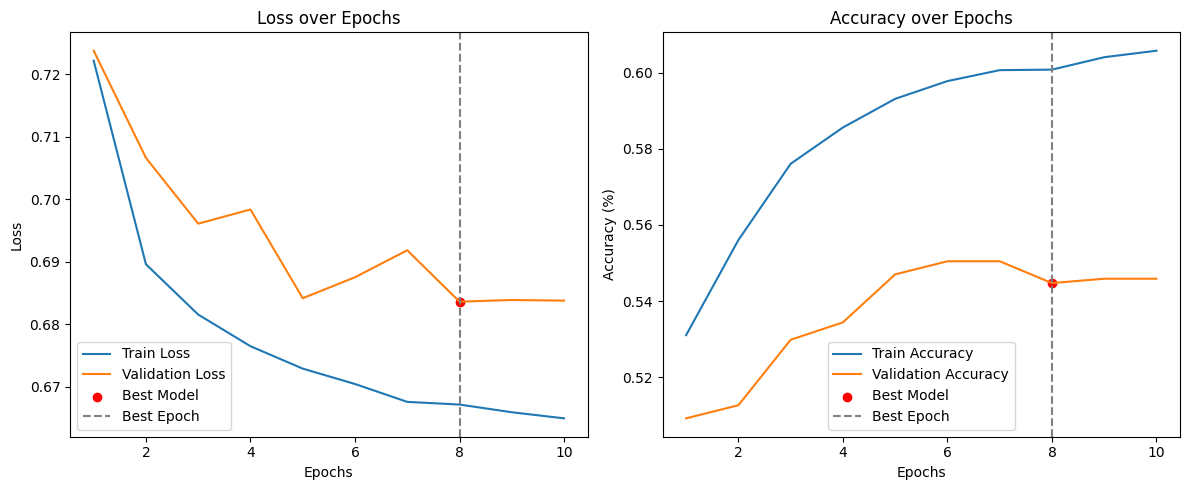

In [10]:
plot_metrics(history)

In [7]:
def get_predictions_and_labels(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels

def compute_confusion_matrix(model, test_loader, device, class_labels, title):
    preds, labels = get_predictions_and_labels(model, test_loader, device)
    cm = confusion_matrix(labels, preds, normalize='true')

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap='viridis')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [8]:
class_labels = ['Negative', 'Positive']

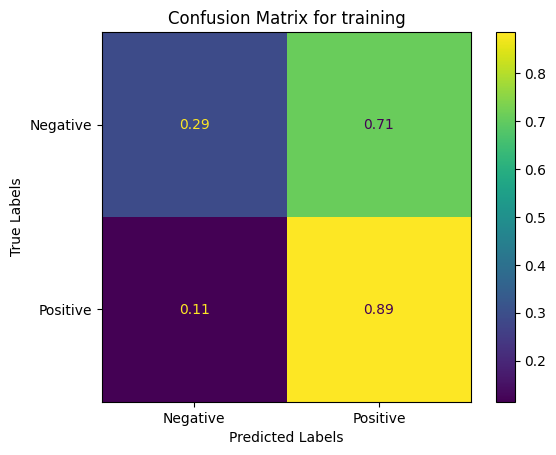

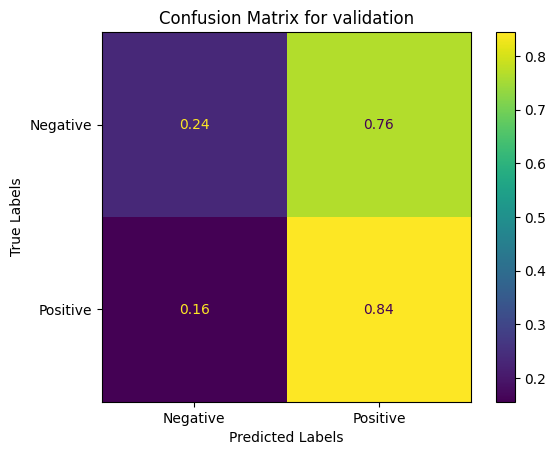

In [13]:
compute_confusion_matrix(model, train_dataloader, device, class_labels, title="Confusion Matrix for training")
compute_confusion_matrix(model, validation_dataloader, device, class_labels, title="Confusion Matrix for validation")
# compute_confusion_matrix(model, test_dataloader, device, class_labels, title="Confusion Matrix for test")

go ahead:

In [15]:
# Load GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

base_model = GPT2Model.from_pretrained("gpt2")

# Define a classification model with an additional linear layer
class GPT2_clss_v2(nn.Module):
    def __init__(self, base_model, num_classes=2):
        super(GPT2_clss_v2, self).__init__()
        self.gpt2 = base_model  # Pretrained GPT-2 without the language modeling head

        # # Freeze GPT-2 parameters to prevent them from being updated
        # for param in self.gpt2.parameters():
        #     param.requires_grad = False
        
        self.aggregate_layer = nn.Linear(self.gpt2.config.hidden_size, self.gpt2.config.hidden_size)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, num_classes)  # Classification head

    def forward(self, input_ids, attention_mask=None):
        # Forward pass through GPT-2 base
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        # Extract the last hidden state of the first token (CLS token equivalent)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # Shape: (batch_size, hidden_size)
        # Aggregate information using the additional linear layer
        aggregated_embedding = torch.relu(self.aggregate_layer(cls_embedding))  # Shape: (batch_size, hidden_size)
        # Pass the aggregated embedding through the classification head
        logits = self.classifier(aggregated_embedding)  # Shape: (batch_size, num_classes)
        return logits

# Instantiate the classification model
num_classes = 2
model_v2 = GPT2_clss_v2(base_model, num_classes)
print(model_v2)

GPT2_clss_v2(
  (gpt2): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (aggregate_layer): Linear(in_features=768, out_features=768, bias=True)
  (classifier): Linear(in_features=768, out_features=2, bias=True)
)


In [13]:
# Define the loss function
criterion = nn.CrossEntropyLoss(label_smoothing=0.2).to(device)

# Move model to device
model = model_v2.to(device)

# Define the optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=30e-6, weight_decay=1e-5) # list(model.aggregate_layer.parameters()) + list(model.classifier.parameters())
scheduler = StepLR(optimizer, step_size=3, gamma=0.4)

In [26]:
history = train(model, epochs=10, 
                train_dataloader=train_dataloader, 
                val_dataloader=validation_dataloader,
                optimizer=optimizer, 
                criterion=criterion, 
                scheduler=scheduler)

Epoch 01: Train Loss: 0.681 | Train Acc: 57.34%
	 Val. Loss: 0.679 |  Val. Acc: 55.16%


Epoch 02: Train Loss: 0.665 | Train Acc: 60.63%
	 Val. Loss: 0.680 |  Val. Acc: 55.28%


Epoch 03: Train Loss: 0.659 | Train Acc: 61.85%
	 Val. Loss: 0.682 |  Val. Acc: 57.68%


Epoch 04: Train Loss: 0.653 | Train Acc: 62.87%
	 Val. Loss: 0.685 |  Val. Acc: 56.42%


Epoch 05: Train Loss: 0.652 | Train Acc: 63.10%
	 Val. Loss: 0.684 |  Val. Acc: 56.54%


Epoch 06: Train Loss: 0.650 | Train Acc: 63.31%
	 Val. Loss: 0.685 |  Val. Acc: 56.65%


Epoch 07: Train Loss: 0.649 | Train Acc: 63.51%
	 Val. Loss: 0.683 |  Val. Acc: 57.34%


Epoch 08: Train Loss: 0.649 | Train Acc: 63.40%
	 Val. Loss: 0.683 |  Val. Acc: 57.45%


Epoch 09: Train Loss: 0.648 | Train Acc: 63.65%
	 Val. Loss: 0.682 |  Val. Acc: 57.00%


<ipython-input-6-b190237fac13>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("best_model.pth")


Epoch 10: Train Loss: 0.647 | Train Acc: 63.63%
	 Val. Loss: 0.682 |  Val. Acc: 57.57%
metrics for best model with lowest validation loss


Train Loss: 0.667 | Train Acc: 61.06%


Val. Loss: 0.679 |  Val. Acc: 55.16%


1


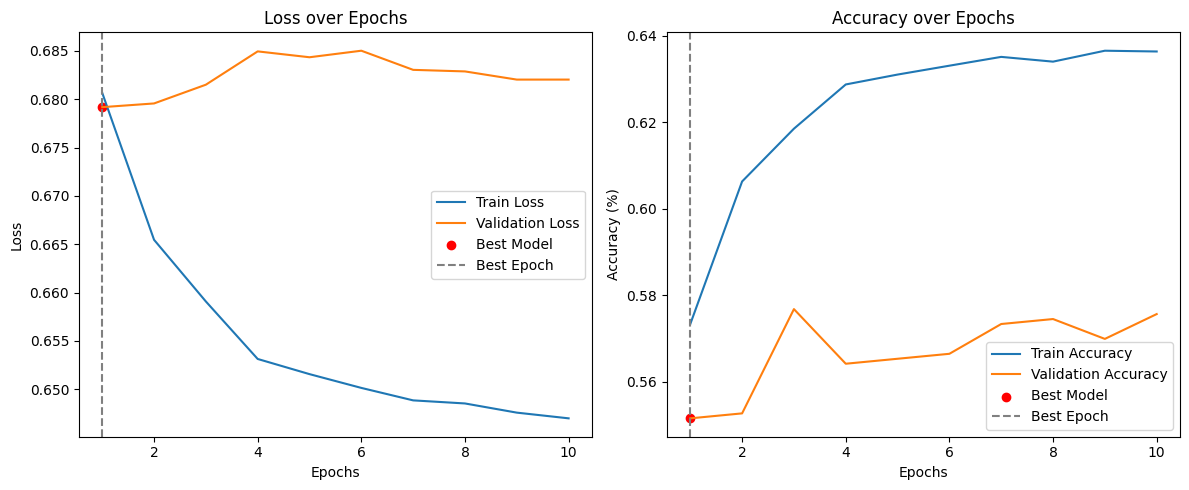

In [27]:
plot_metrics(history)

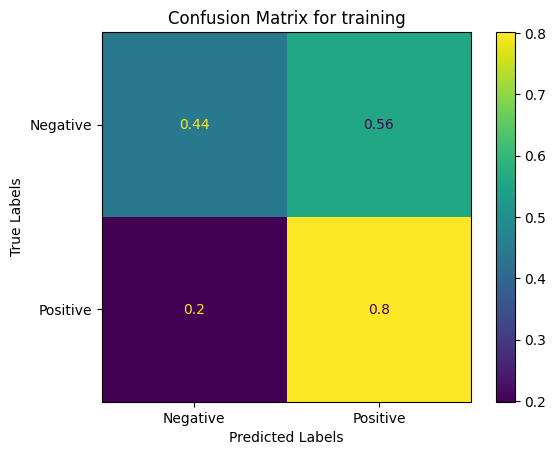

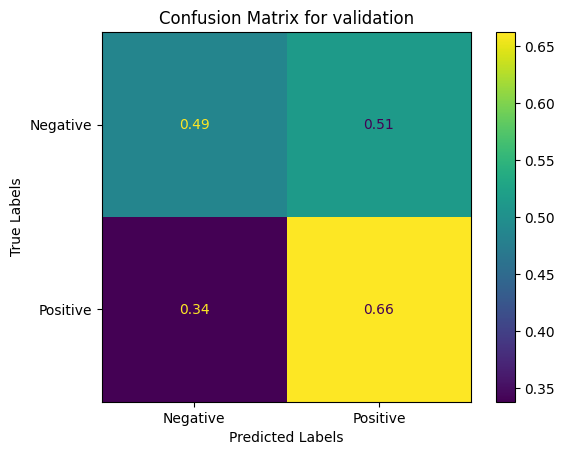

In [28]:
compute_confusion_matrix(model, train_dataloader, device, class_labels, title="Confusion Matrix for training")
compute_confusion_matrix(model, validation_dataloader, device, class_labels, title="Confusion Matrix for validation")
# compute_confusion_matrix(model, test_dataloader, device, class_labels, title="Confusion Matrix for test")

In [38]:
# Example input
input_text = "I love this movie."
input_ids = tokenizer.encode(input_text, return_tensors="pt", padding=True, truncation=True, max_length=36).to(device)

# Forward pass
logits = model(input_ids)
print("Logits:", logits)

Logits: tensor([[1.1179, 1.3212]], device='cuda:0', grad_fn=<AddmmBackward0>)


# Section 6

In [17]:
# Load GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

base_model = GPT2Model.from_pretrained("gpt2")

# Define a classification model with a bidirectional attention layer
class GPT2_clss_v3(nn.Module):
    def __init__(self, base_model, num_classes=2, num_attention_heads=12):
        super(GPT2_clss_v3, self).__init__()
        self.gpt2 = base_model  # Pretrained GPT-2 without the language modeling head

        # Multi-head self-attention layer
        self.attention = nn.MultiheadAttention(embed_dim=self.gpt2.config.hidden_size, num_heads=num_attention_heads, batch_first=True)
        # Classification head
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # Forward pass through GPT-2 base
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract the last hidden state (shape: batch_size, seq_len, hidden_size)
        last_hidden_state = outputs.last_hidden_state
        
        # Pass through the multi-head attention layer
        attention_output, _ = self.attention(last_hidden_state, last_hidden_state, last_hidden_state)
        
        cls_embedding = attention_output[:, 0, :]  # Shape: (batch_size, hidden_size)
        
        # Pass the CLS embedding through the classification head
        logits = self.classifier(cls_embedding)  # Shape: (batch_size, num_classes)
        return logits

# Instantiate the classification model
num_classes = 2
num_attention_heads = 12
model_v3 = GPT2_clss_v3(base_model, num_classes, num_attention_heads)
print(model_v3)

GPT2_clss_v3(
  (gpt2): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (classifier): Linear(in_features=768, out_features=2, 

In [12]:
# Define the loss function
criterion = nn.CrossEntropyLoss(label_smoothing=0.2).to(device)

# Move model to device
model = model_v3.to(device)

# Define the optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=15e-6, weight_decay=1e-5) # list(model.aggregate_layer.parameters()) + list(model.classifier.parameters())
scheduler = StepLR(optimizer, step_size=3, gamma=0.5)

In [13]:
history = train(model, epochs=10, 
                train_dataloader=train_dataloader, 
                val_dataloader=validation_dataloader,
                optimizer=optimizer,
                criterion=criterion, 
                scheduler=scheduler)

Epoch 01: Train Loss: 0.590 | Train Acc: 72.85%
	 Val. Loss: 0.483 |  Val. Acc: 86.01%


Epoch 02: Train Loss: 0.456 | Train Acc: 88.69%
	 Val. Loss: 0.459 |  Val. Acc: 87.39%


Epoch 03: Train Loss: 0.430 | Train Acc: 91.06%
	 Val. Loss: 0.446 |  Val. Acc: 89.33%


Epoch 04: Train Loss: 0.414 | Train Acc: 92.57%
	 Val. Loss: 0.442 |  Val. Acc: 90.14%


Epoch 05: Train Loss: 0.406 | Train Acc: 93.21%
	 Val. Loss: 0.446 |  Val. Acc: 90.14%


Epoch 06: Train Loss: 0.400 | Train Acc: 93.82%
	 Val. Loss: 0.440 |  Val. Acc: 91.17%


Epoch 07: Train Loss: 0.395 | Train Acc: 94.35%
	 Val. Loss: 0.442 |  Val. Acc: 91.06%


Epoch 08: Train Loss: 0.393 | Train Acc: 94.44%
	 Val. Loss: 0.443 |  Val. Acc: 90.71%


Epoch 09: Train Loss: 0.390 | Train Acc: 94.78%
	 Val. Loss: 0.440 |  Val. Acc: 91.06%


<ipython-input-7-b190237fac13>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("best_model.pth")


Epoch 10: Train Loss: 0.387 | Train Acc: 94.92%
	 Val. Loss: 0.440 |  Val. Acc: 91.17%
metrics for best model with lowest validation loss


Train Loss: 0.371 | Train Acc: 96.42%


Val. Loss: 0.440 |  Val. Acc: 91.06%


9


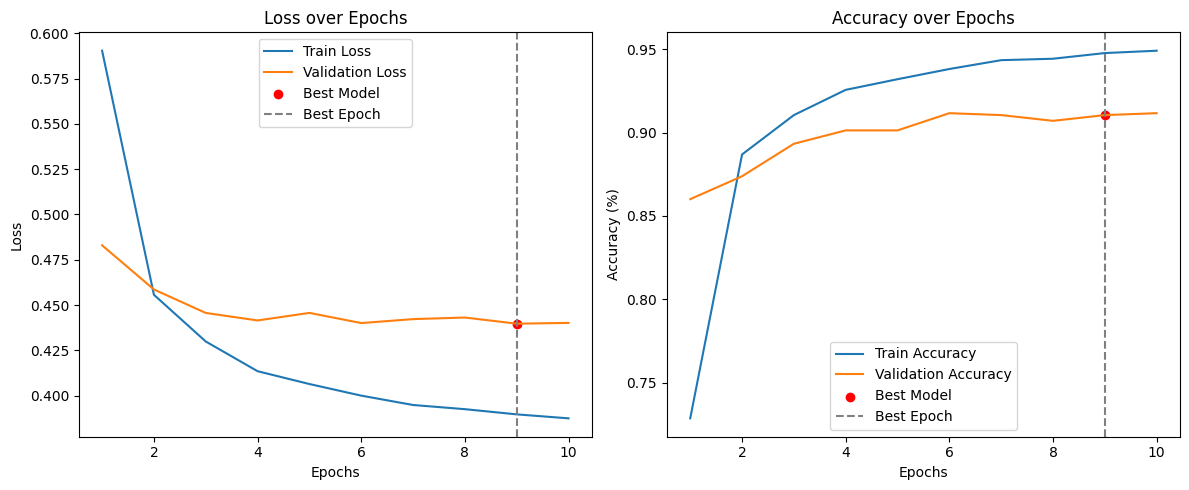

In [14]:
plot_metrics(history)

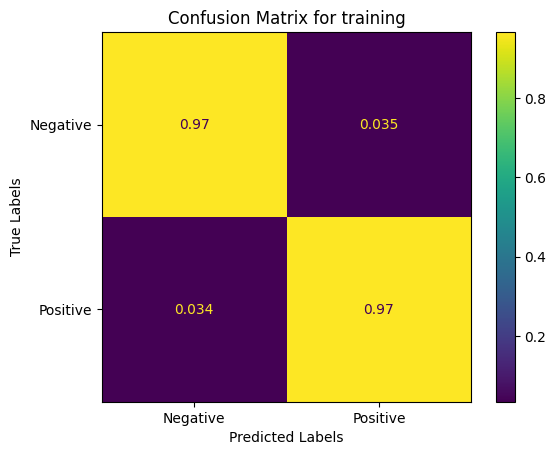

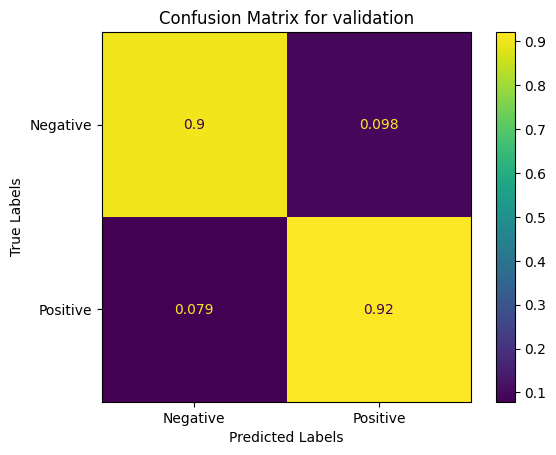

In [15]:
compute_confusion_matrix(model, train_dataloader, device, class_labels, title="Confusion Matrix for training")
compute_confusion_matrix(model, validation_dataloader, device, class_labels, title="Confusion Matrix for validation")
# compute_confusion_matrix(model, test_dataloader, device, class_labels, title="Confusion Matrix for test")

# Section 7

In [18]:
# Load GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

base_model = GPT2Model.from_pretrained("gpt2")

class GPT2_clss_ltr_attention(nn.Module):
    def __init__(self, base_model, num_classes=2, num_heads=12):
        super(GPT2_clss_ltr_attention, self).__init__()
        self.gpt2 = base_model  # Pretrained GPT-2 without the language modeling head
        
        # Multi-head attention for left-to-right
        self.attention_layer = nn.MultiheadAttention(embed_dim=self.gpt2.config.hidden_size, 
                                                     num_heads=num_heads, 
                                                     batch_first=True)
        # Classification head
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # Forward pass through GPT-2 base
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract the last hidden state (batch_size, seq_len, hidden_size)
        last_hidden_state = outputs.last_hidden_state
        
        # Generate a left-to-right mask
        seq_len = last_hidden_state.size(1)
        ltr_mask = torch.tril(torch.ones(seq_len, seq_len)).to(last_hidden_state.device)
        
        # Apply left-to-right attention
        attention_output, _ = self.attention_layer(last_hidden_state, last_hidden_state, last_hidden_state, attn_mask=ltr_mask)
        
        cls_embedding = attention_output[:, 0, :]  # Shape: (batch_size, hidden_size)
        
        # Pass the CLS embedding through the classification head
        logits = self.classifier(cls_embedding)  # Shape: (batch_size, num_classes)
        return logits

# Instantiate the left-to-right attention model
num_classes = 2
model_v4= GPT2_clss_ltr_attention(base_model, num_classes, num_heads=12)
print(model_v4)

GPT2_clss_ltr_attention(
  (gpt2): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (attention_layer): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (classifier): Linear(in_features=768,

In [17]:
# Define the loss function
criterion = nn.CrossEntropyLoss(label_smoothing=0.2).to(device)

# Move model to device
model = model_v4.to(device)

# Define the optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=15e-6, weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=3, gamma=0.5)

In [18]:
history = train(model, epochs=10, 
                train_dataloader=train_dataloader, 
                val_dataloader=validation_dataloader,
                optimizer=optimizer,
                criterion=criterion, 
                scheduler=scheduler)

Epoch 01: Train Loss: 0.610 | Train Acc: 71.54%
	 Val. Loss: 0.481 |  Val. Acc: 87.16%


Epoch 02: Train Loss: 0.461 | Train Acc: 88.21%
	 Val. Loss: 0.459 |  Val. Acc: 88.76%


Epoch 03: Train Loss: 0.433 | Train Acc: 90.69%
	 Val. Loss: 0.444 |  Val. Acc: 89.68%


Epoch 04: Train Loss: 0.415 | Train Acc: 92.51%
	 Val. Loss: 0.443 |  Val. Acc: 90.37%


Epoch 05: Train Loss: 0.409 | Train Acc: 93.10%
	 Val. Loss: 0.444 |  Val. Acc: 90.48%


Epoch 06: Train Loss: 0.402 | Train Acc: 93.71%
	 Val. Loss: 0.443 |  Val. Acc: 91.06%


Epoch 07: Train Loss: 0.396 | Train Acc: 94.23%
	 Val. Loss: 0.445 |  Val. Acc: 90.71%


Epoch 08: Train Loss: 0.394 | Train Acc: 94.43%
	 Val. Loss: 0.444 |  Val. Acc: 90.71%


Epoch 09: Train Loss: 0.392 | Train Acc: 94.63%
	 Val. Loss: 0.442 |  Val. Acc: 90.94%


<ipython-input-7-b190237fac13>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("best_model.pth")


Epoch 10: Train Loss: 0.388 | Train Acc: 94.87%
	 Val. Loss: 0.442 |  Val. Acc: 90.83%
metrics for best model with lowest validation loss


Train Loss: 0.372 | Train Acc: 96.37%


Val. Loss: 0.442 |  Val. Acc: 90.94%


9


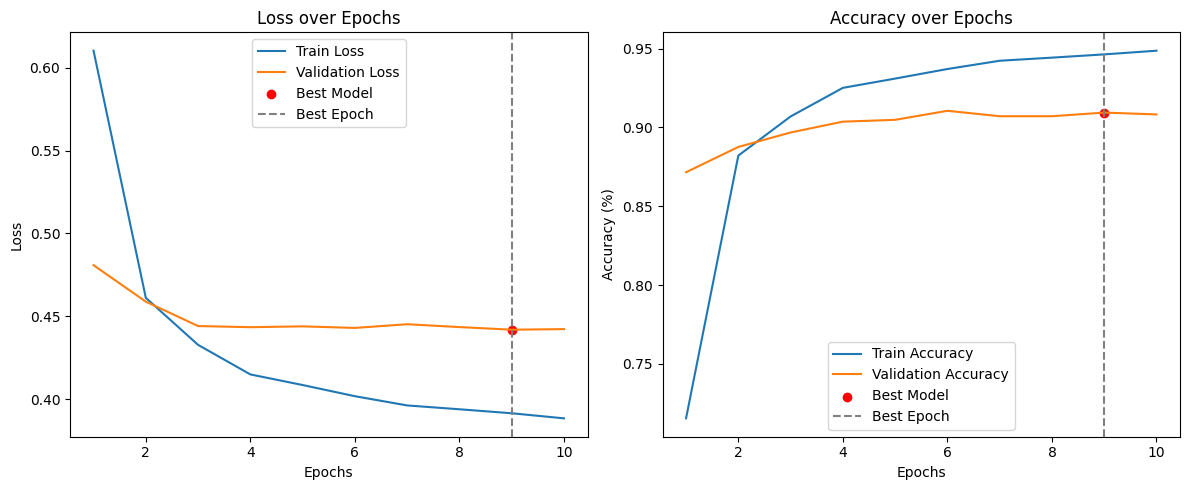

In [19]:
plot_metrics(history)

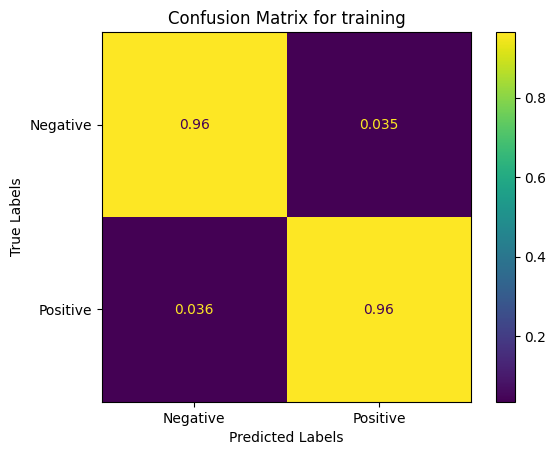

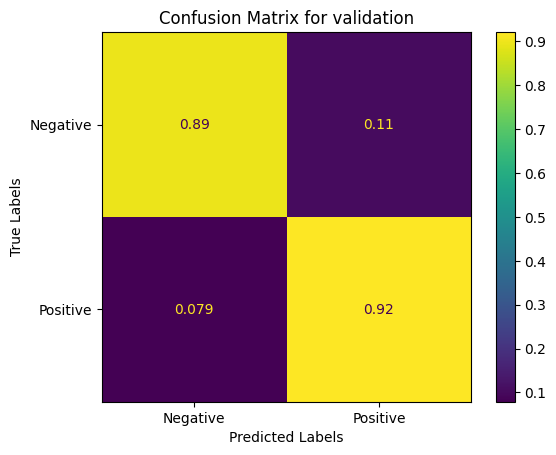

In [20]:
compute_confusion_matrix(model, train_dataloader, device, class_labels, title="Confusion Matrix for training")
compute_confusion_matrix(model, validation_dataloader, device, class_labels, title="Confusion Matrix for validation")

In [19]:
class GPT2_clss_rtl_attention(nn.Module):
    def __init__(self, base_model, num_classes=2, num_heads=12):
        super(GPT2_clss_rtl_attention, self).__init__()
        self.gpt2 = base_model  # Pretrained GPT-2 without the language modeling head
        
        # Multi-head attention for right-to-left
        self.attention_layer = nn.MultiheadAttention(embed_dim=self.gpt2.config.hidden_size, 
                                                     num_heads=num_heads, 
                                                     batch_first=True)
        # Classification head
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # Forward pass through GPT-2 base
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract the last hidden state (batch_size, seq_len, hidden_size)
        last_hidden_state = outputs.last_hidden_state
        
        # Generate a right-to-left mask
        seq_len = last_hidden_state.size(1)
        rtl_mask = torch.triu(torch.ones(seq_len, seq_len)).to(last_hidden_state.device)
        
        # Apply right-to-left attention
        attention_output, _ = self.attention_layer(last_hidden_state, last_hidden_state, last_hidden_state, attn_mask=rtl_mask)
        
        cls_embedding = attention_output[:, 0, :]  # Shape: (batch_size, hidden_size)
        
        # Pass the CLS embedding through the classification head
        logits = self.classifier(cls_embedding)  # Shape: (batch_size, num_classes)
        return logits

# Instantiate the right-to-left attention model
num_classes = 2
model_v5 = GPT2_clss_rtl_attention(base_model, num_classes, num_heads=12)
print(model_v5)


GPT2_clss_rtl_attention(
  (gpt2): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (attention_layer): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (classifier): Linear(in_features=768,

In [26]:
# Define the loss function
criterion = nn.CrossEntropyLoss(label_smoothing=0.2).to(device)

# Move model to device
model = model_v5.to(device)

# Define the optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=15e-6, weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=3, gamma=0.5)

In [27]:
history = train(model, epochs=10, 
                train_dataloader=train_dataloader, 
                val_dataloader=validation_dataloader,
                optimizer=optimizer,
                criterion=criterion, 
                scheduler=scheduler)

Epoch 01: Train Loss: 0.398 | Train Acc: 93.83%
	 Val. Loss: 0.458 |  Val. Acc: 89.91%


Epoch 02: Train Loss: 0.379 | Train Acc: 95.74%
	 Val. Loss: 0.446 |  Val. Acc: 90.60%


Epoch 03: Train Loss: 0.374 | Train Acc: 96.14%
	 Val. Loss: 0.462 |  Val. Acc: 90.48%


Epoch 04: Train Loss: 0.369 | Train Acc: 96.62%
	 Val. Loss: 0.454 |  Val. Acc: 90.14%


Epoch 05: Train Loss: 0.366 | Train Acc: 96.77%
	 Val. Loss: 0.451 |  Val. Acc: 90.71%


Epoch 06: Train Loss: 0.365 | Train Acc: 96.86%
	 Val. Loss: 0.454 |  Val. Acc: 90.60%


Epoch 07: Train Loss: 0.363 | Train Acc: 97.12%
	 Val. Loss: 0.459 |  Val. Acc: 90.37%


Epoch 08: Train Loss: 0.361 | Train Acc: 97.20%
	 Val. Loss: 0.457 |  Val. Acc: 90.60%


Epoch 09: Train Loss: 0.361 | Train Acc: 97.28%
	 Val. Loss: 0.457 |  Val. Acc: 90.60%


<ipython-input-7-b190237fac13>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("best_model.pth")


Epoch 10: Train Loss: 0.359 | Train Acc: 97.39%
	 Val. Loss: 0.457 |  Val. Acc: 90.60%
metrics for best model with lowest validation loss


Train Loss: 0.358 | Train Acc: 97.58%


Val. Loss: 0.446 |  Val. Acc: 90.60%


2


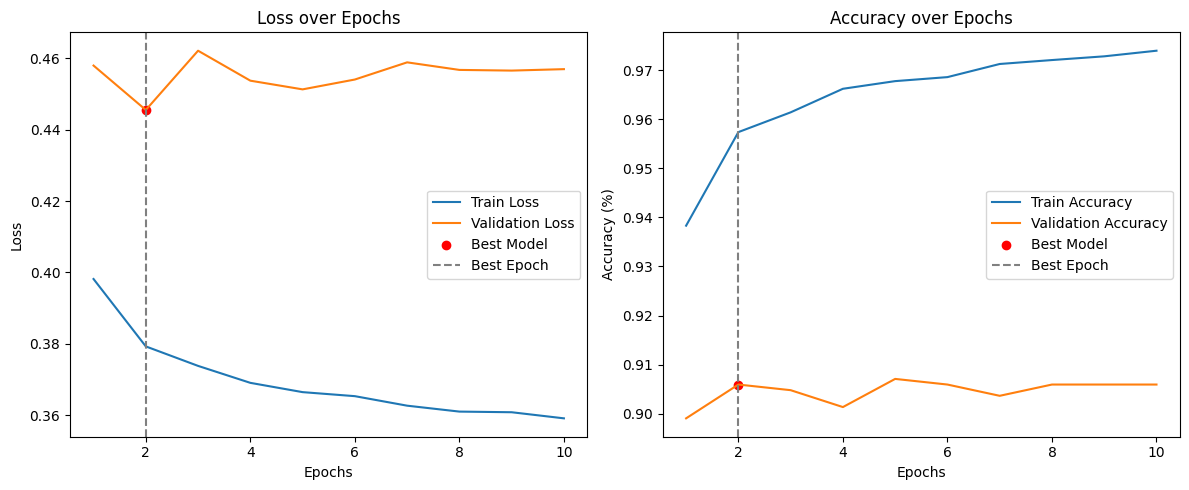

In [28]:
plot_metrics(history)

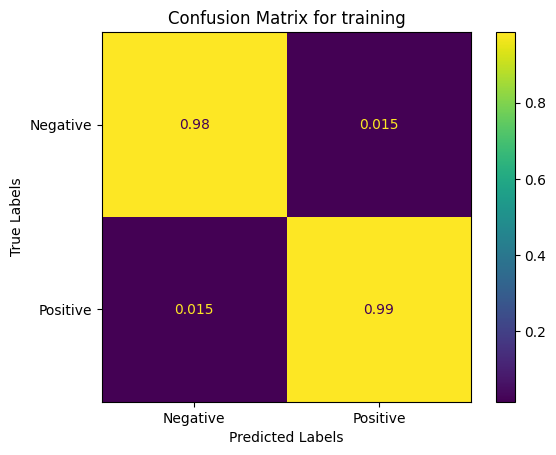

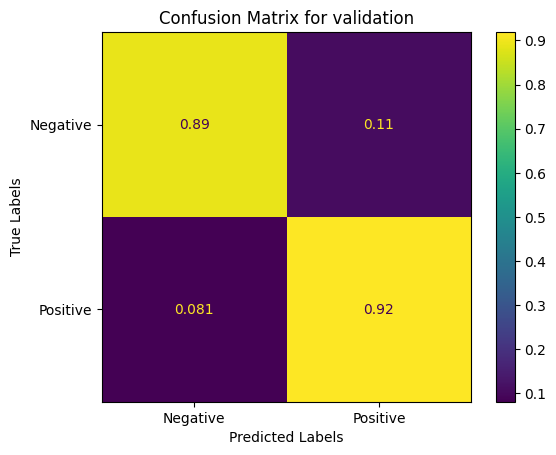

In [29]:
compute_confusion_matrix(model, train_dataloader, device, class_labels, title="Confusion Matrix for training")
compute_confusion_matrix(model, validation_dataloader, device, class_labels, title="Confusion Matrix for validation")

# Section 8

In [21]:
model_name = "textattack/bert-base-uncased-SST-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

encoded_dataset = dataset.map(preprocess_function, batched=True)

batch_size = 256
validation_dataset = SST2Dataset(encoded_dataset, split="validation")
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size)

# Example: Check one batch of tokenized and padded data
for batch in validation_dataloader:
    print(batch["input_ids"].shape)  # Shape: (batch_size, max_length)
    print(batch["attention_mask"].shape)  # Shape: (batch_size, max_length)
    print(batch["labels"].shape)  # Shape: (batch_size)
    break

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

torch.Size([256, 36])
torch.Size([256, 36])
torch.Size([256])


In [22]:
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient computation for inference
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Compute predictions
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy on the SST-2 test set with fine-tuned BERT: {accuracy:.4f}")


Accuracy on the SST-2 test set with fine-tuned BERT: 0.9209


In [4]:
def plot_confusion(title, preds, labels, class_labels):
    cm = confusion_matrix(labels, preds, normalize='true')
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap='viridis')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

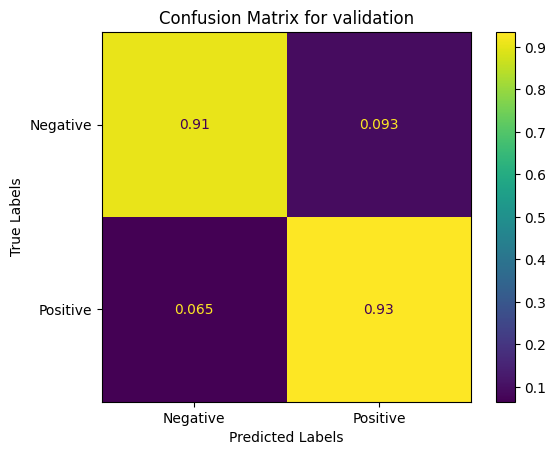

In [11]:
class_labels = ['Negative', 'Positive']
plot_confusion("Confusion Matrix for validation", all_preds, all_labels, class_labels)

### **1. Why is Model v2 Slightly Better Than v1?**

#### **Key Difference in Architecture**:
- **Model v1**:
  - Uses the raw CLS embedding (from GPT-2's last hidden state) for classification.
  - No additional layers for refining features.
- **Model v2**:
  - Introduces an **aggregation layer (Linear + ReLU)** before the classifier, which transforms the CLS embedding into a more meaningful representation.

#### **Performance**:
- Validation Accuracy:
  - **v2**: 57.57%
  - **v1**: 54.47%

#### **Reasons for Performance**:
1. **Why v2 Performs Better**:
   - The aggregation layer refines the raw CLS embedding, reducing noise and emphasizing key features.
   - Non-linear transformations (via ReLU) enable the model to capture more complex patterns compared to v1's direct classification.
   - Improved feature representation leads to better class separation in decision space.

2. **Why v1 Performs Worse**:
   - Direct use of the CLS embedding without refinement results in noisy, less informative features.
   - This limits the model's ability to generalize well to the validation set.

---

### **2. Why is Model v3 Much Better Than v1 and v2?**

#### **Key Difference in Architecture**:
- **v3** introduces a **bidirectional multi-head self-attention layer**, allowing tokens to attend to both past and future context, unlike v1 and v2, which rely solely on the CLS token.

#### **Performance**:
- Validation Accuracy:
  - **v3**: 91.06%
  - **v2**: 57.57%
  - **v1**: 54.47%

#### **Reasons for Performance**:
1. **Why v3 Performs Better**:
   - **Full Context Utilization**: Bidirectional attention allows every token to attend to all other tokens in the sequence. This is crucial for sentiment classification, as important sentiment cues can appear anywhere in the sentence.
   - **Rich Feature Aggregation**: The attention mechanism aggregates information from all tokens, leading to more robust representations.
   - **Better Generalization**: The bidirectional context helps resolve ambiguities and provides a more holistic understanding of the sentence.

2. **Why v1 and v2 Perform Worse**:
   - They rely solely on the CLS token, which cannot fully represent the entire sequence, especially when sentiment cues are spread across multiple tokens.
   - They lack the capacity to model relationships between distant tokens.

---

### **3. Comparison of Models v3, v4, and v5**

#### **Key Differences in Architecture**:
- **v3 (Bidirectional Attention)**:
  - Every token attends to all others in the sequence (past and future).
- **v4 (Left-to-Right Attention)**:
  - Each token attends only to itself and previous tokens (causal mask).
- **v5 (Right-to-Left Attention)**:
  - Each token attends only to itself and subsequent tokens (reverse causal mask).

#### **Performance**:
- Validation Accuracy:
  - **v3**: 91.06%
  - **v4**: 90.94%
  - **v5**: 90.60%

#### **Reasons for Performance**:
1. **Why v3 Performs the Best**:
   - Bidirectional attention provides the most complete context, enabling better understanding of the sentence structure and sentiment.
   - It captures relationships between tokens regardless of their position, which is essential for classification tasks.

2. **Why v4 Performs Slightly Worse Than v3**:
   - Left-to-right attention only incorporates past context. While effective for capturing causal dependencies, it cannot utilize future tokens, limiting its ability to resolve ambiguities.

3. **Why v5 Performs Slightly Worse Than v4**:
   - Right-to-left attention processes sentences in reverse, which misaligns with the natural flow of text. This can reduce interpretability and effectiveness for sentiment classification in most datasets where key information often appears earlier in the sentence.

---

### **4. Comparison with Fine-Tuned BERT**

#### **Key Differences in Architecture**:
- **Fine-Tuned BERT**:
  - Fully bidirectional model optimized for understanding tasks.
  - Trained using a masked language modeling (MLM) objective, which enhances its ability to model token relationships in context.
- **GPT-2 Models (v1–v5)**:
  - GPT-2 models are optimized for generative tasks with unidirectional attention (except v3), making them less ideal for classification.

#### **Performance**:
- Validation Accuracy:
  - **Fine-Tuned BERT**: 92.09%
  - **Best GPT-2 Model (v3)**: 91.06%

#### **Reasons for Performance**:
1. **Why Fine-Tuned BERT Performs the Best**:
   - **Pretraining Objective**: BERT’s MLM objective teaches it to predict masked tokens based on bidirectional context, making it better suited for understanding tasks like sentiment classification.
   - **Efficient Fine-Tuning**: Fine-tuning adapts BERT's pre-trained embeddings specifically to SST-2, enhancing task-specific performance.
   - **Contextual Embeddings**: BERT embeddings are inherently optimized for classification, unlike GPT-2 embeddings, which are geared towards text generation.

2. **Why GPT-2 Models Perform Worse**:
   - GPT-2’s architecture is designed for autoregressive tasks, making it less efficient at integrating bidirectional context compared to BERT.
   - Even with modifications (v3–v5), GPT-2 models cannot fully match the efficiency and specificity of BERT’s embeddings for classification tasks.

---

### **Conclusion**

#### **Model Rankings**:
1. **Fine-Tuned BERT**: Best overall, thanks to its architecture and pretraining.
2. **Model v3 (Bidirectional Attention)**: Strong performance due to effective context integration.
3. **Model v4 (Left-to-Right Attention)**: Slightly weaker than v3 but aligns well with natural text flow.
4. **Model v5 (Right-to-Left Attention)**: Limited by reverse processing, which misaligns with natural sentence structure.
5. **Model v2 (Aggregation Layer)**: Improves over v1 by refining CLS embeddings.
6. **Model v1 (Basic CLS Embedding)**: Baseline performance with limited contextual understanding.

#### **Factors Influencing Performance**:
1. **Contextual Understanding**:
   - Bidirectional models (v3, BERT) excel at integrating information across the sequence.
2. **Architectural Alignment**:
   - Left-to-right models (v4) align better with natural text progression.
3. **Feature Refinement**:
   - Aggregation layers (v2) improve feature quality compared to raw CLS embeddings (v1).
4. **Pretraining Objective**:
   - BERT’s MLM objective gives it an edge in understanding tasks compared to GPT-2’s autoregressive objective.

By analyzing these architectural differences, we see how each model's design impacts its ability to handle sentiment classification tasks effectively.

#### **Final Recommendations**:
- For tasks like SST-2 with short sentences, **Fine-Tuned BERT** or **Bidirectional GPT-2 (v3)** is optimal.
- Use unidirectional models (v4 or v5) only if computational efficiency is critical or if task-specific constraints align with their design.

---------
### References

[1] Raffel, Colin, Noam Shazeer, Adam Roberts, et al. (2020). *Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer*. [Link to paper](https://arxiv.org/abs/1910.10683)

[2] Touvron, Hugo, et al. (2023). *LLaMA 2: Open Foundation and Fine-Tuned Chat Models*. [Link to paper](https://arxiv.org/abs/2307.09288)

<span style="color:yellow;">*For further reading on this field of research, you can refer to the following papers:*</span>

[3] BehnamGhader, Adlakha, et al. (2024). *LLM2Vec: Large Language Models Are Secretly Powerful Text Encoders*. [Link to paper](https://arxiv.org/abs/2404.05961)

[4] Gao, Tianyu, et al. (2021). *SimCSE: Simple Contrastive Learning of Sentence Embeddings*. [Link to paper](https://arxiv.org/abs/2104.08821)

[5] Lee, et al. (2023). *NV-Embed: Improved Techniques for Training LLMs as Generalist Embedding Models*. [Link to paper](https://arxiv.org/abs/2405.17428)




# **Best regards.**